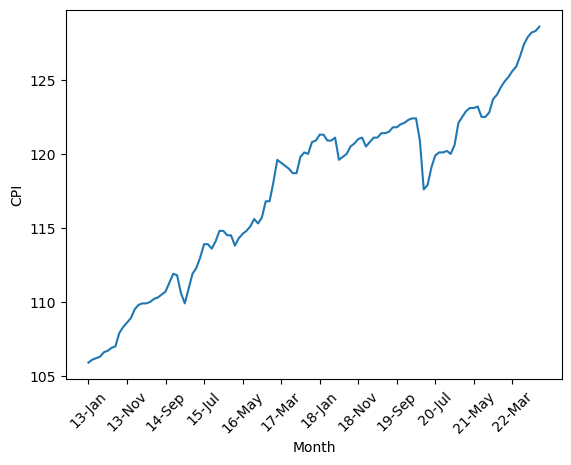

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     537.4
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.48e-59
Time:                        21:44:46   Log-Likelihood:                -237.84
No. Observations:                 118   AIC:                             481.7
Df Residuals:                     115   BIC:                             490.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Money_Supply  2.741e-05   1.17e-06     23.496   

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

# Load the data
df = pd.read_csv('Malaysia1.csv', index_col=0)

# Plot the YoY inflation rates
# Rotate the x-axis label and choose the tick interval
plt.plot(df['CPI'])
plt.xticks(rotation=45)
plt.xticks(np.arange(0, len(df), 10), df.index[::10])
plt.xlabel('Month')
plt.ylabel('CPI')
plt.show()

# Select the features and target variable
x = df.drop(['CPI'], axis=1)
y = df['CPI']

# Add a constant term to the features
# Adding a constant term to the features allows you to fit an intercept term in the regression model. 
# In other words, it allows the model to make predictions when all the feature values are zero.
x = x.assign(const=1)

# Fit the model on the training set
model = sm.OLS(y, x)
results = model.fit()

# Calculate the residuals
residuals = results.resid

# Print the results
print(results.summary())

        feature        VIF
0  Money_Supply   3.113984
1  Unemployment   3.113984
2         const  51.227945


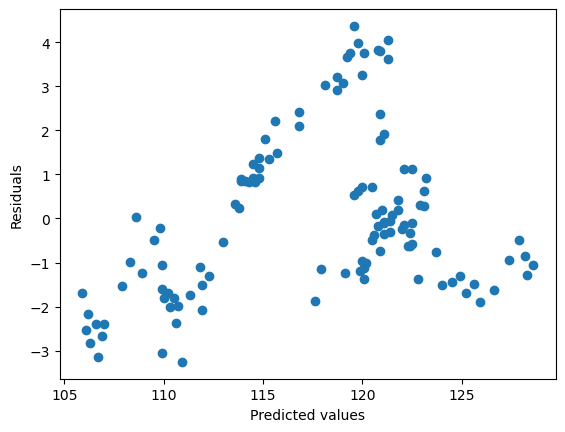

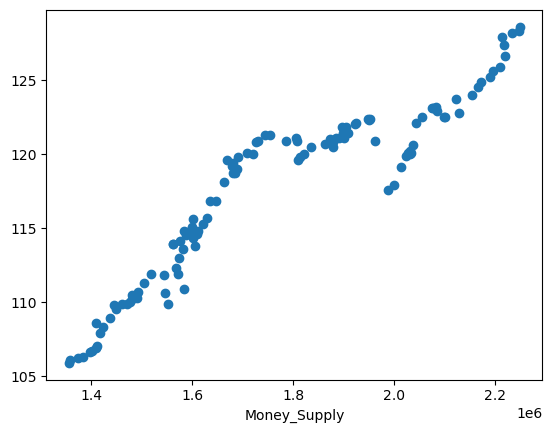

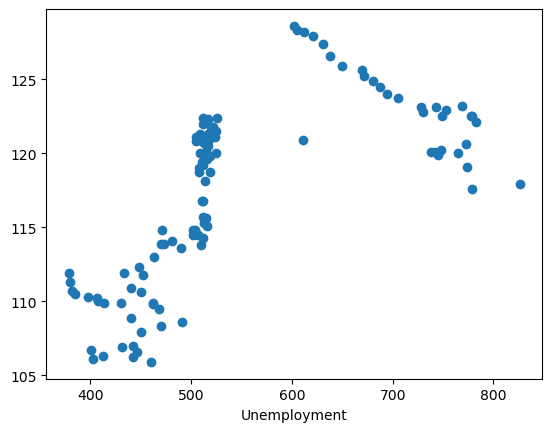

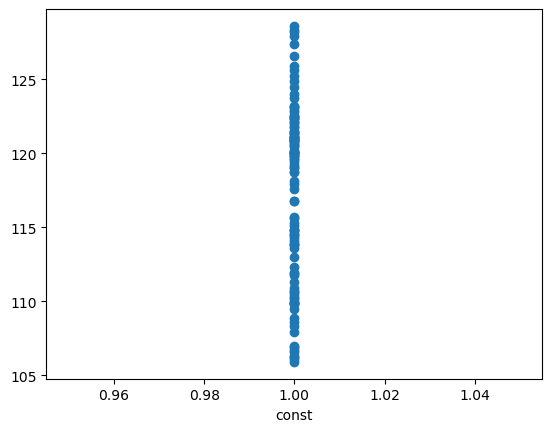

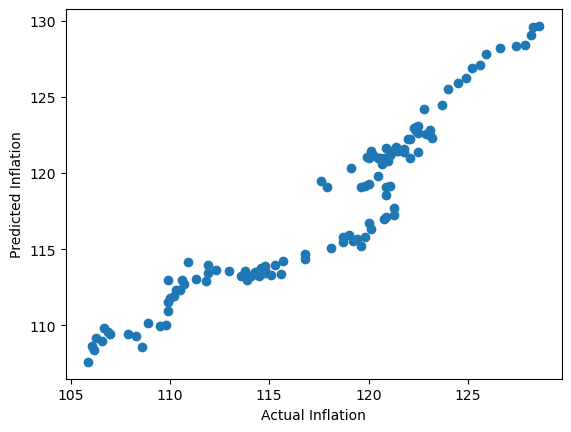

In [6]:
# Make predictions on the test set
y_pred = results.predict(x)

# Test for multicollinearity
# Numpy array and Pandas dataframe are diff, so need to convert dataframe to array using the 'values' attribute
# Compute the VIF for each feature
# Print the results
vif = pd.DataFrame()
vif["feature"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

# Check for homoscedasticity
# If the residuals are homoscedastic, they should be evenly distributed around the horizontal line at 0. 
# If there is a pattern in the residuals, it may indicate that the assumption of homoscedasticity is violated.
plt.scatter(y, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Check for assumptions of linearity
# Create a scatter plot of each factors
# If the relationship is not linear, may want to consider using a non-linear model or transforming the data.
for feature in x.columns:
    plt.scatter(x[feature], y)
    plt.xlabel(feature)
    plt.show()

# Plot the actual and predicted values
# This plot can be used to visualize the fit of the OLS model. 
# If the model is a good fit, the points on the plot should be close to a diagonal line from the bottom left to the top right. 
# If the model is a poor fit, the points will be scattered further away from this diagonal line.
plt.scatter(y, y_pred)
plt.xlabel('Actual Inflation')
plt.ylabel('Predicted Inflation')
plt.show()